In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [13]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data[['sepal length (cm)', 'sepal width (cm)']]
data_class = iris.target

Посмотрим на данные:

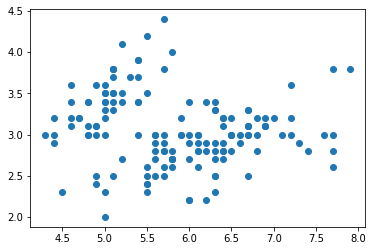

In [79]:
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'])

# Дискриминантный анализ

In [4]:
x_train, x_test, y_train, y_test = train_test_split(data, data_class, test_size=0.30, random_state=10)

In [5]:
lda = LinearDiscriminantAnalysis()

In [6]:
lda.fit(x_train, y_train)
y_pred = lda.predict(x_test)

Визуализация предсказания для тестовой выборки и центры классов

Text(0.5, 1.0, 'Предсказания для тестовой выборки и центры классов')

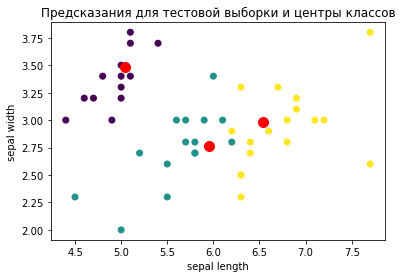

In [22]:
plt.scatter(x_test['sepal length (cm)'], x_test['sepal width (cm)'], c=y_pred)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], color='red', s=100)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Предсказания для тестовой выборки и центры классов')

Посмотрим на метрику точности:

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))

0.7777777777777778

# Кластеризация, метод KMeans

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### Нормализация данных

In [72]:
# x_train, x_test= train_test_split(data, test_size=0.40, random_state=10)
# scaled = StandardScaler()

# # Обучаем на тренировочной выборке
# scaled.fit(x_train)

# # Применяем к тестовой
# x_scaled = scaled.transform(x_test)

In [73]:
scaled = StandardScaler()
scaled.fit(data)
data_scaled = scaled.transform(data)

### Метод локтя для определения оптимального кол-ва кластеров

In [85]:
k_inertia = []
ks = range(1, 10)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

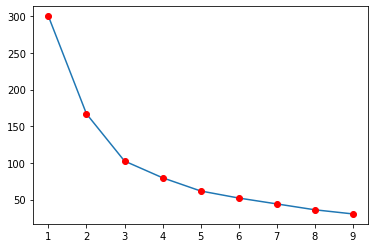

In [75]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Рассмотрев визуализацию метода Локтя, можно прийти к выводу, что оптимальнее будет выбрать 3 кластера

### Строим визуализацию после определения кол-ва кластеров

In [82]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

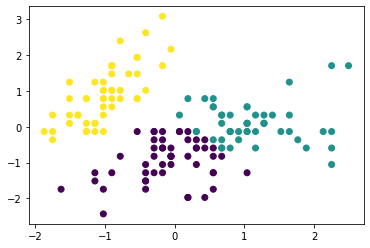

In [83]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters)